In [78]:
# initialization
import numpy as np

# importing Qiskit
from qiskit import *

# import basic plot tools
from qiskit.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeJakarta

from qiskit.providers.fake_provider import FakeNairobi

In [69]:
#defining  a function to create the Grovers Algorithm circuit. Function takes in the oracle and number or qubits
# and ouputs the circuit 

def Grover_function(oracle,n):
    
   
    # n input qubits 
    qc = QuantumCircuit(n,n)
    
    # creating superposition of all the inputs
    for i in range(n):
        qc.h(i)
    qc.barrier()
    
     # Grovers function is implemented for m times as it is basically a rotation function applied for m times.
    # m calculated by finding approximately the angle of the total superposition with the "B" set and the number
    #of times the superposition has to be rotated by twice of that angle to reach the "A" state.
    
    m=int(np.round(np.pi*np.sqrt(2**n)/4 - 0.5))
    
    for i in range(m):
    
        # applying the oracle that has the funciton encoded in it to the circuit 
        qc.append(oracle, range(n))
        qc.barrier()
        
        # applying the second set of hadamard gates 
        for i in range(n):
            qc.h(i)
        
    
    
        # implementing the Z_0 gate (all x followed by one hadamard followed by mcx 
        #followed by hadamard followed by all x)
    
        for i in range(n):
            qc.x(i)
            
        qc.h(0)
        qubit=[]
        for i in range(n-1):
            qubit.append(i+1)
        qc.mcx(qubit, 0)
        qc.h(0)
    
        for i in range(n):
            qc.x(i)
    
    
    
        #applying the hadamard gates again to collapse the superposition to one state that has the final result 
        #encoded in it. 
        for i in range(n):
            qc.h(i)
    
    
    # measuring the input qubits to find the final result. 
    qc.measure(range(n),range(n))
    
    
    return (qc)

In [70]:
# Function for generating a general grover's oracle (Zf) for n qubits and 
# inp: input string such that f(inp) = 1

def Grover_oracle(n, inp):
    
    cir = QuantumCircuit(n)
    
    # Applying X gate where ever the string is zero to convert the whole string to n 1's and then applying 
    # controlled z gate to phase flip the particular state
    
    
    for i in range(n):
        if inp[i]=='0':
            cir.x(n-i-1)
    
    # Multiple controlled Z gate using MCX
    cir.h(0)
    cir.mcx([i for i in range(1,n)], 0)
    cir.h(0)
    
    # Applying X gates to reverse the effect of above applied X gates
    
    for i in range(len(inp)):
        if inp[i]=='0':
            cir.x(n-i-1)
            
    return cir

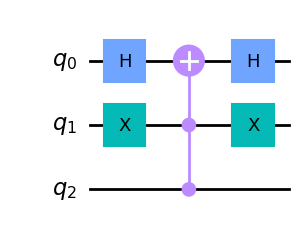

In [71]:
# Testing the algorithm for n=3 and f('101') = 1

n = 3
oracle  = Grover_oracle(n, '101')
oracle.draw('mpl')

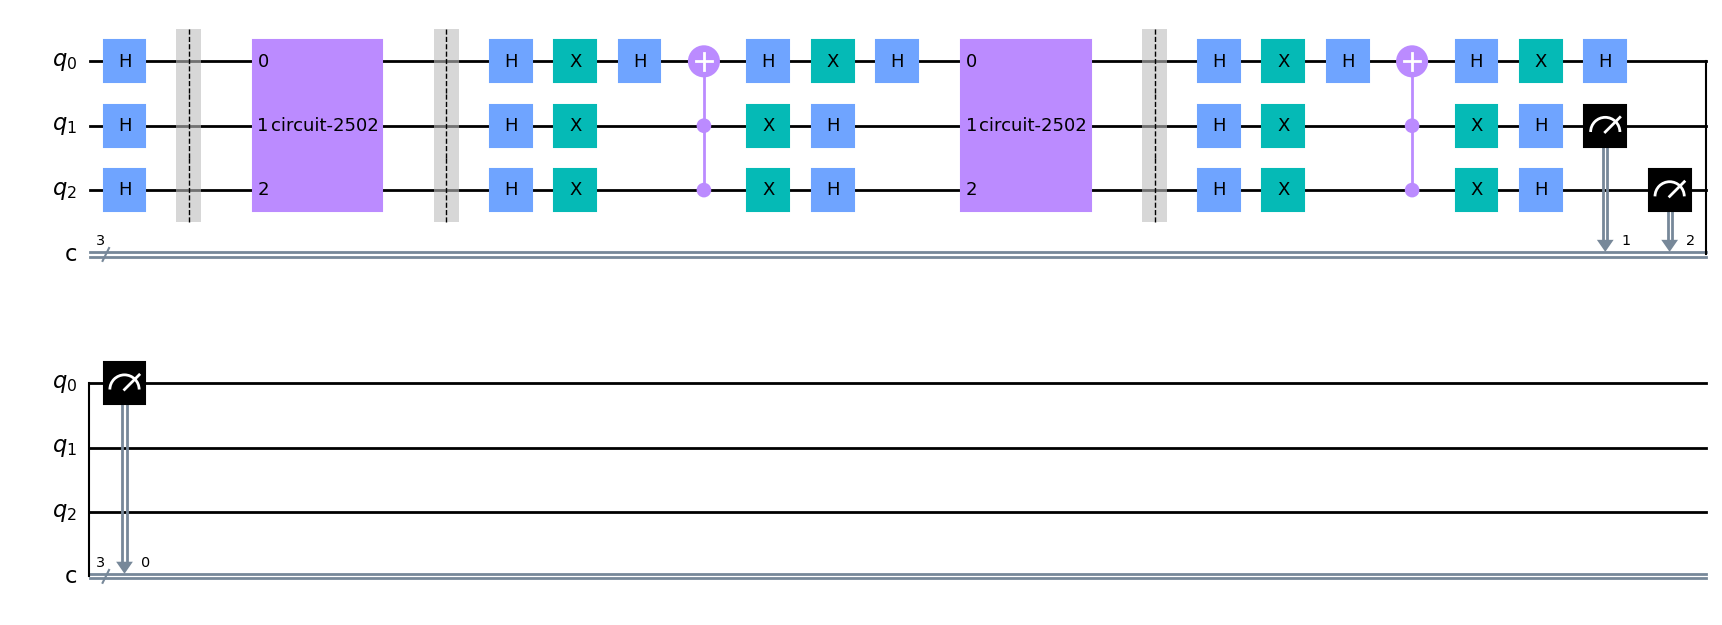

In [72]:
q1 = Grover_function(oracle, n)
q1.draw('mpl')

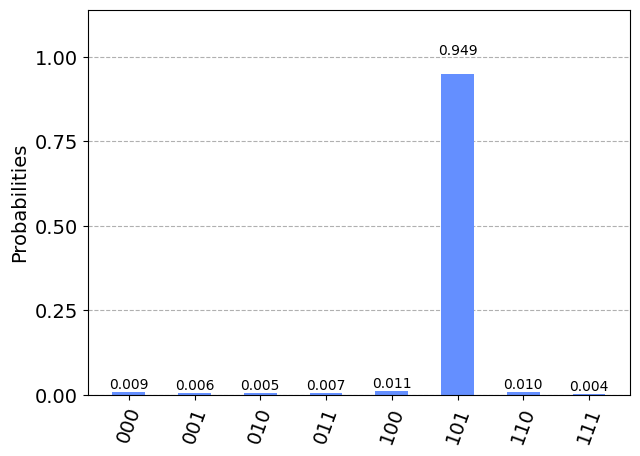

In [74]:
# Running on non-noisy simulator

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

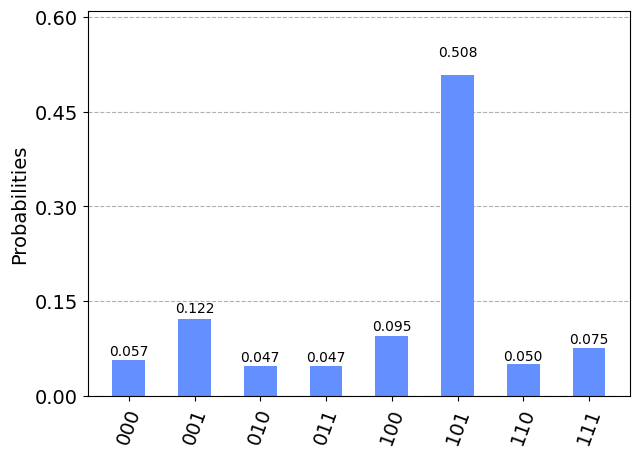

In [77]:
# Running on noisy simulator

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

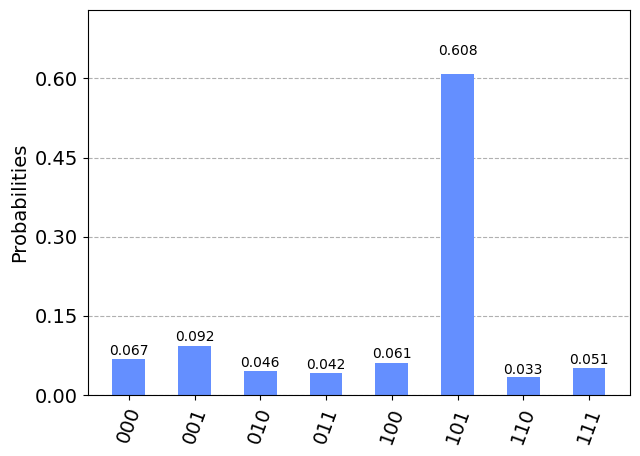

In [79]:
# Running on noisy simulator

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

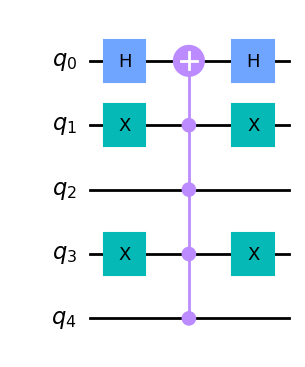

In [80]:
# Testing the algorithm 

n = 5
oracle  = Grover_oracle(n, '10101')
oracle.draw('mpl')

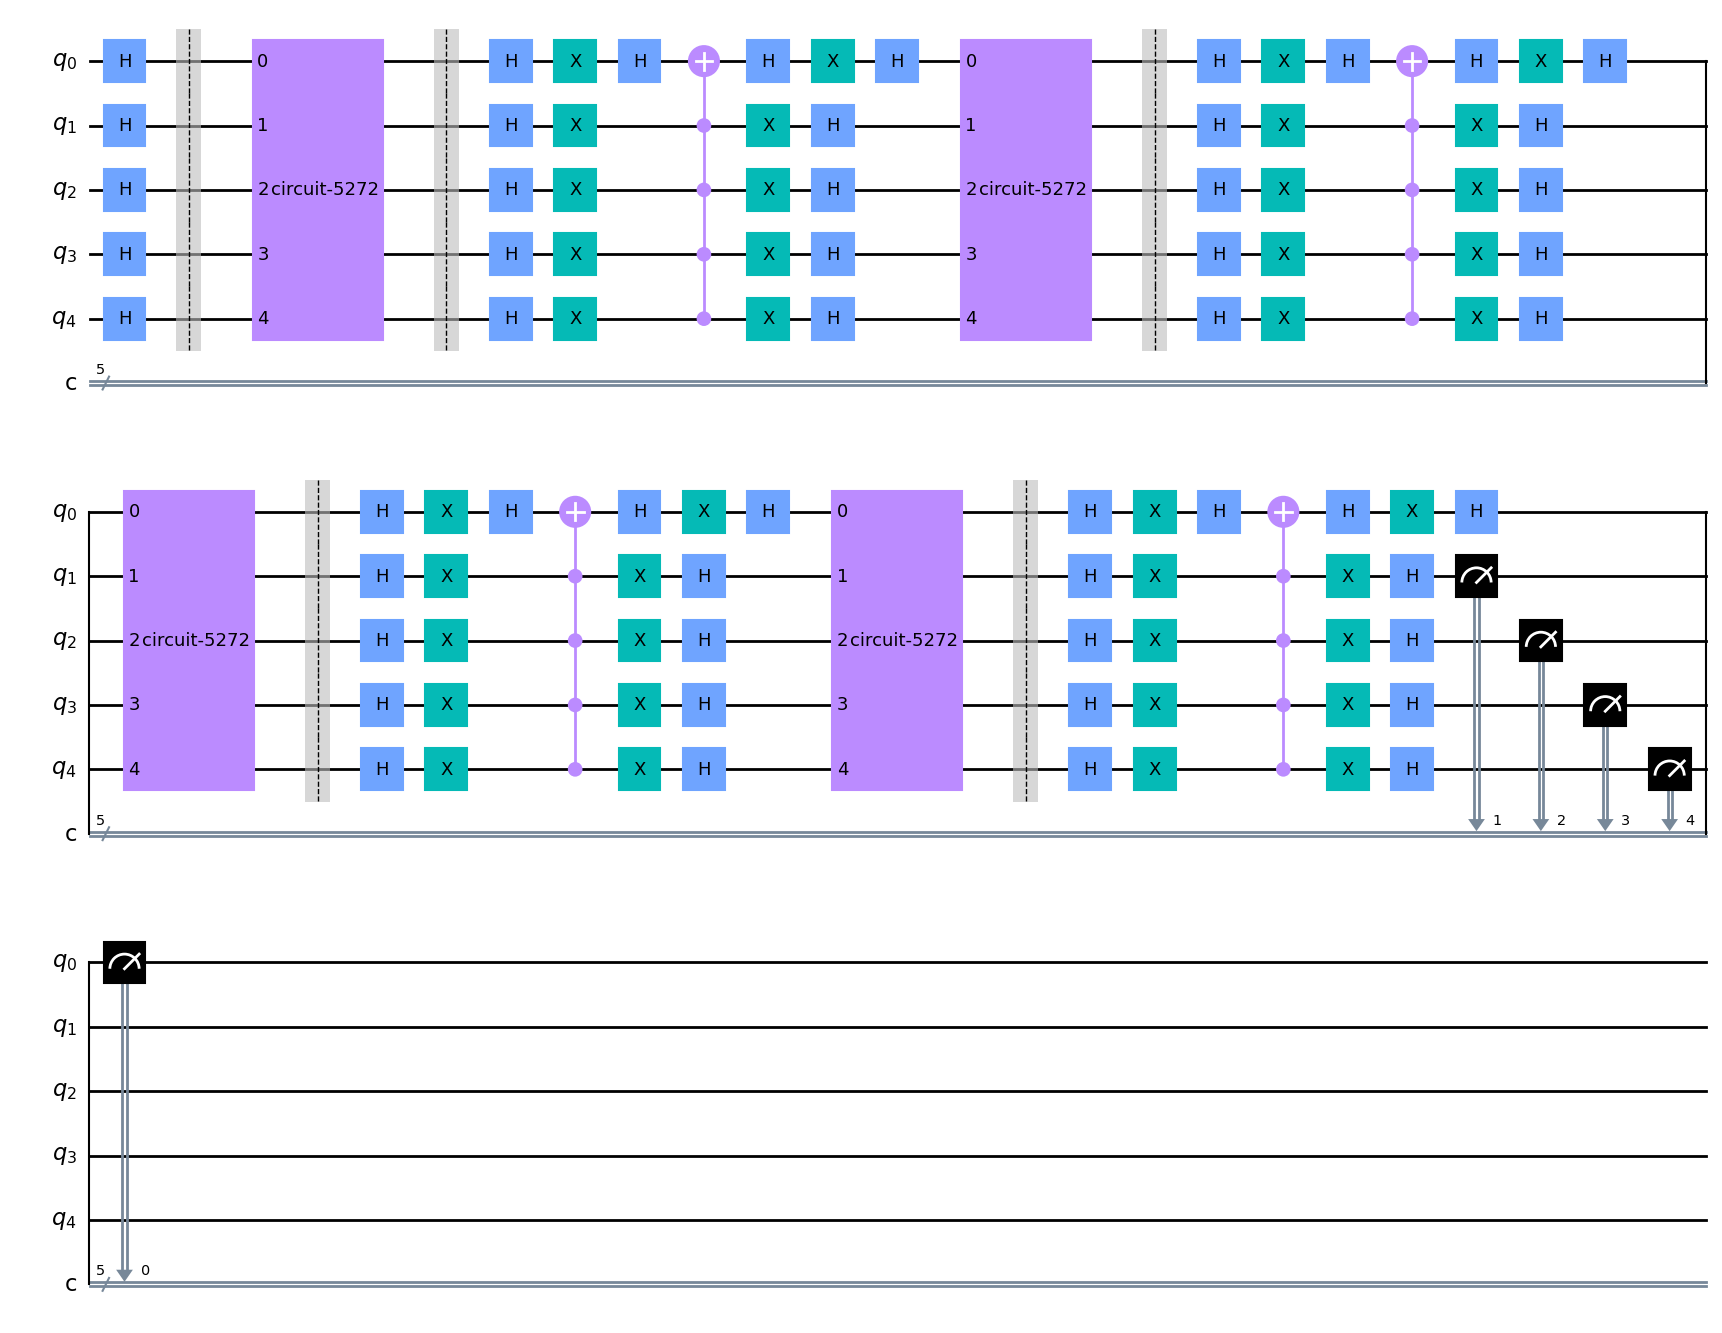

In [81]:
q1 = Grover_function(oracle, n)
q1.draw('mpl')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


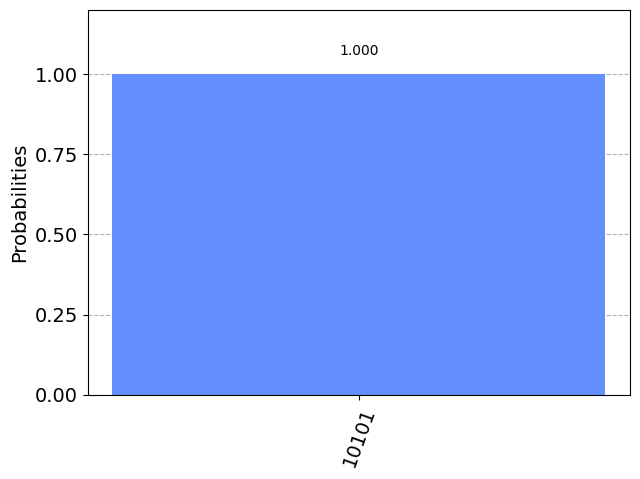

In [82]:
# Running on non-noisy simulator

backend = Aer.get_backend('aer_simulator')
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

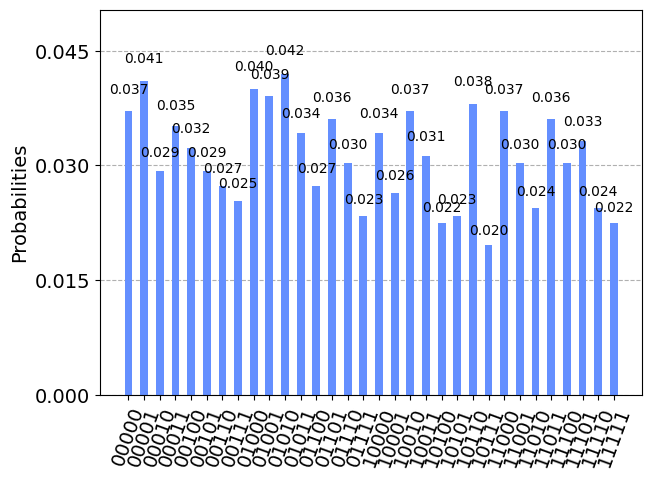

In [83]:
# Running on noisy simulator

backend = FakeJakarta()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)

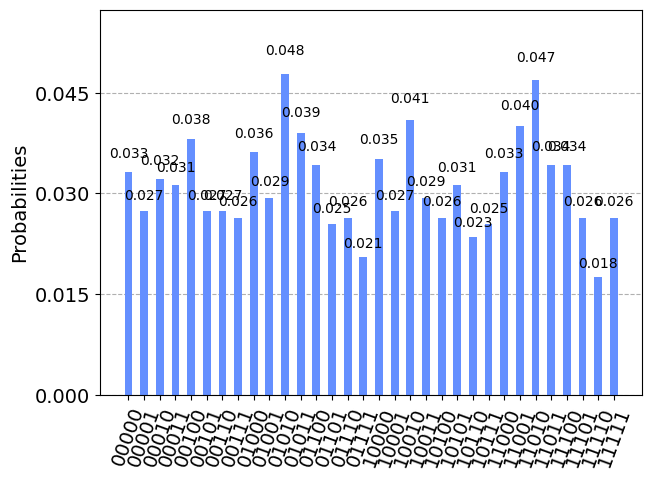

In [84]:
# Running on noisy simulator

backend = FakeNairobi()
job = execute(q1,backend)
results = job.result()
counts = results.get_counts()
plot_histogram(counts)